# The Spark Foundation

## Name : Huma Urooj 
## Batch : August 2024

## Task 6

## Prediction Using Decision Tree Algorithm

### Create the decision tree classifier and visualize it graphically
### the purpose is if we feed any new data to this classifier, it would be able to predict the righjt class accordingly


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

In [2]:
df = pd.read_csv("Iris (1).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.drop(['Id'], axis= 1 , inplace=True)


In [11]:
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
Species = LabelEncoder()

In [16]:
df["Species"]= Species.fit_transform(df["Species"])

     

In [17]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
X= df.iloc[: , 0:4]
y= df.iloc[: ,-1]

In [20]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [24]:
train_test_split(X, y, test_size = 0.2, random_state = 40)

[    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 62            6.0           2.2            4.0           1.0
 23            5.1           3.3            1.7           0.5
 26            5.0           3.4            1.6           0.4
 48            5.3           3.7            1.5           0.2
 2             4.7           3.2            1.3           0.2
 ..            ...           ...            ...           ...
 71            6.1           2.8            4.0           1.3
 12            4.8           3.0            1.4           0.1
 50            7.0           3.2            4.7           1.4
 7             5.0           3.4            1.5           0.2
 70            5.9           3.2            4.8           1.8
 
 [120 rows x 4 columns],
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 38             4.4           3.0            1.3           0.2
 66             5.6           3.0            4.5           1.5
 115            6.4           3.2       

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
Classifier = DecisionTreeClassifier(criterion='gini')


In [27]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
Classifier.predict(X_test)

array([0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 0, 1])

In [29]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
48,5.3,3.7,1.5,0.2
78,6.0,2.9,4.5,1.5
100,6.3,3.3,6.0,2.5
115,6.4,3.2,5.3,2.3
22,4.6,3.6,1.0,0.2
32,5.2,4.1,1.5,0.1
55,5.7,2.8,4.5,1.3
72,6.3,2.5,4.9,1.5
132,6.4,2.8,5.6,2.2
35,5.0,3.2,1.2,0.2


In [30]:
Classifier.score(X_test,y_test)

0.9666666666666667

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 37, 41]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.499\nsamples = 78\nvalue = [0, 37, 41]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 5.05\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'x[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4615384615384

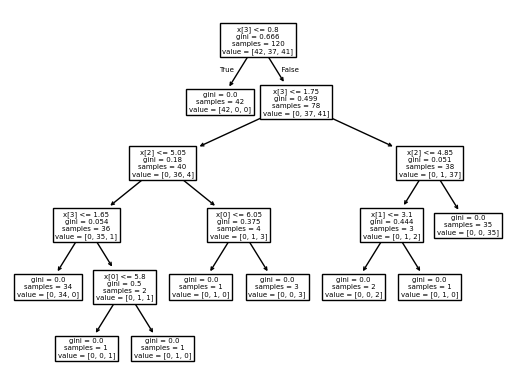

In [31]:
tree.plot_tree(Classifier)

<function matplotlib.pyplot.show(close=None, block=None)>

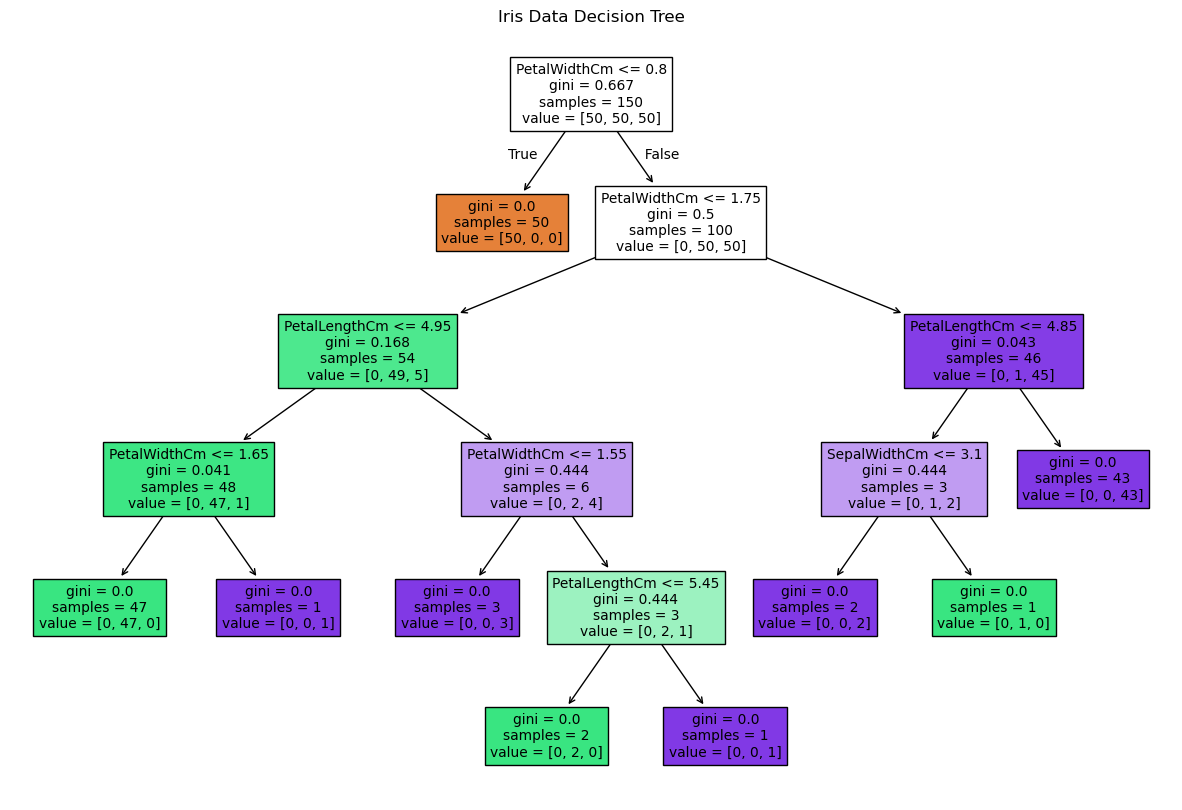

In [52]:
plt.figure(figsize = (15,10))
tree.plot_tree(model,feature_names = df.iloc[:,0:4].columns.values,
              filled = True)
plt.title("Iris Data Decision Tree")
plt.show